<a href="https://colab.research.google.com/github/perch97/leetcode/blob/main/CNN_chem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pickle
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torchsummary import summary
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!ls /content/drive


MyDrive


In [9]:
!ls "/content/drive/My Drive"


 1
 1080p.mov
'1 step:.gdoc'
 2023_SoQ_Advanced_Statistics_Smirnov_Vadim_HW2.gdoc
 2_5339183216999794202.pdf
 A.A.Kaufman_2005.pdf
 Analyst.gdoc
 bar_chart_data.csv
 bar_chart_data.gsheet
'Chap2 2.doc'
 Classroom
'Colab Notebooks'
 compnetworks.pdf
'Computer Vision_ Algorithms and Applications [Szeliski 2010-11-24].pdf'
'Copy of IMG_0969.CR2'
 COver_CGG.gdoc
 Cover_Letter_Optics_Vadim.gdoc
'COVER LETTER_Siemens.gdoc'
 Cover_Letter_Societe.gdoc
 Cover_Letter_Vadim_Smirnov.gdoc
 CV_for_jobs.pdf
 CV.gdoc
 CV_Hudson.gdoc
'Data Engineer.gdoc'
'Data Scientist - Market .gdoc'
 dataset.py
'Document Print.pdf'
 Dokuchaev.tex
 ED4FBD36-1538-43CC-8629-A09C4B2B2BD2.jpeg
 features_nsigmas10_order9.pkl
 FHD0061.MOV
 fin_position_template.gdoc
'Full waveform inversion (FWI) is a high-resolution seismic imaging technique that is based on using the entire content of seismic traces for extracting the physical parameters of the medium sampled by seismic waves.gdoc'
 Fundamentals-of-Wireless-Sensor-Networ

In [14]:
df = pd.read_csv('/content/drive/MyDrive/id_prop_fixed.csv',index_col=False)

In [15]:
df

,Unnamed: 0,target
0,0,0.099463
1,1,-0.634670
2,2,-0.725799
3,3,-1.355152
4,4,-1.351551
...,...,...
4161,4161,-0.435823
4162,4162,-0.379858
4163,4163,-1.004029
4164,4164,-3.709410


In [142]:
df = df[['target']]

In [143]:
df.tail()

,target
4161,-0.435823
4162,-0.379858
4163,-1.004029
4164,-3.709410
4165,-3.637291


In [144]:
df.shape

(4166, 1)

In [145]:
df.to_csv('targets.csv')

In [146]:
targets = torch.tensor(df.to_numpy(), dtype=torch.float64)

In [147]:
targets[0:5]

tensor([[ 0.0995],
        [-0.6347],
        [-0.7258],
        [-1.3552],
        [-1.3516]], dtype=torch.float64)

In [148]:
# Replace 'filename.pkl' with the path to your .pkl file
filename = '/content/drive/MyDrive/features_nsigmas10_order9.pkl'

# Open the file in read-binary mode
with open(filename, 'rb') as file:
    data = pickle.load(file)

In [149]:
for i in range(3):
    print(f'{i}: {data[i].shape} \n', data[i], '\n')

0: (20, 101) 
 [[5.21799530e-02 6.06684109e-02 4.12501088e-01 ... 2.41105240e+09
  4.40482748e+09 5.88314319e+09]
 [5.45447672e-02 6.30343172e-02 4.15025185e-01 ... 2.46341956e+09
  4.83376000e+09 6.99879938e+09]
 [3.90408890e-02 4.75317684e-02 3.99716037e-01 ... 3.47519156e+09
  7.68983175e+09 1.90415141e+10]
 ...
 [3.83751312e-02 4.01373821e-02 3.32272553e-01 ... 2.57619493e+09
  5.64896059e+09 1.23784605e+10]
 [3.79784228e-02 3.97403821e-02 3.31832387e-01 ... 3.71960637e+09
  1.10908870e+10 2.66653350e+10]
 [1.97595129e-02 2.15189190e-02 3.13227495e-01 ... 2.79142370e+09
  5.33259113e+09 1.37341910e+10]] 

1: (32, 101) 
 [[3.69140541e-02 4.54023559e-02 3.97230730e-01 ... 3.60706069e+09
  6.31744728e+09 1.55274947e+10]
 [3.43248733e-02 4.28113227e-02 3.94390537e-01 ... 3.18292866e+09
  5.13305151e+09 1.39656188e+10]
 [3.43151531e-02 4.28015790e-02 3.94376997e-01 ... 3.20749237e+09
  5.18248482e+09 1.40095855e+10]
 ...
 [1.35516397e-01 1.38235527e-01 4.23717752e-01 ... 4.55009045e+09


In [150]:
len(data[0])

20

In [151]:
print(set([len(data[i]) for i in range(len(data))]))

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 98, 100, 102, 104, 106, 107, 108, 109, 110, 112, 118, 120, 128, 132, 136, 138, 140, 142, 144, 145, 148, 152, 164, 180, 182}


In [138]:
# def pad_matrix(matrix, target_rows = 182, pad_value=0):
#     rows, cols = matrix.shape
#     print(f'Before: number of rows: {rows}, ',f'number of cols: {cols}' )

#     padding = (0, 0, 0, target_rows - rows)  # (left, right, top, bottom)
#     padded_matrix = F.pad(matrix, padding, "constant", pad_value)
#     print(f'Now: number of rows: {padded_matrix.shape[0]}, ',f'number of cols: {padded_matrix.shape[1]} \n' )
#     return padded_matrix

In [152]:
def pad_matrix(matrix, target_rows=182, pad_value=0):
    rows, cols = matrix.shape
    print(f'Before: number of rows: {rows}, number of cols: {cols}')

    # Calculate the total number of rows to pad
    total_pad = target_rows - rows

    if total_pad > 0:
        # Calculate the padding values
        pad_top = total_pad // 2
        pad_bottom = total_pad - pad_top

        # Apply padding
        padding = (0, 0, pad_top, pad_bottom)  # (left, right, top, bottom)
        padded_matrix = F.pad(matrix, padding, "constant", pad_value)
    else:
        # No padding needed if the matrix already meets or exceeds target_rows
        padded_matrix = matrix

    print(f'Now: number of rows: {padded_matrix.shape[0]}, number of cols: {padded_matrix.shape[1]} \n')
    return padded_matrix

In [153]:
matrices = [torch.tensor(matrix, dtype=torch.float32) for matrix in data]

In [154]:
padded_matrices = [pad_matrix(matrix) for matrix in matrices]

Выходные данные были обрезаны до нескольких последних строк (5000).
Now: number of rows: 182, number of cols: 101 

Before: number of rows: 8, number of cols: 101
Now: number of rows: 182, number of cols: 101 

Before: number of rows: 8, number of cols: 101
Now: number of rows: 182, number of cols: 101 

Before: number of rows: 4, number of cols: 101
Now: number of rows: 182, number of cols: 101 

Before: number of rows: 4, number of cols: 101
Now: number of rows: 182, number of cols: 101 

Before: number of rows: 4, number of cols: 101
Now: number of rows: 182, number of cols: 101 

Before: number of rows: 4, number of cols: 101
Now: number of rows: 182, number of cols: 101 

Before: number of rows: 34, number of cols: 101
Now: number of rows: 182, number of cols: 101 

Before: number of rows: 24, number of cols: 101
Now: number of rows: 182, number of cols: 101 

Before: number of rows: 32, number of cols: 101
Now: number of rows: 182, number of cols: 101 

Before: number of rows: 36

In [161]:
padded_matrices[0][100]

tensor([1.9760e-02, 2.1519e-02, 3.1323e-01, 4.6460e-01, 3.8045e-01, 3.1622e-01,
        2.9087e-01, 2.8441e-01, 2.8388e-01, 2.8458e-01, 2.8530e-01, 6.7634e-08,
        1.0484e-05, 4.7740e-05, 1.4126e-04, 2.9027e-04, 4.4400e-04, 5.8090e-04,
        6.8673e-04, 7.6294e-04, 8.7613e-04, 1.6207e-09, 3.5676e-05, 5.9374e-04,
        3.5144e-03, 1.0117e-02, 1.9850e-02, 3.2913e-02, 4.6278e-02, 5.5197e-02,
        5.8426e-02, 2.5029e-11, 7.7620e-05, 4.5486e-03, 5.6812e-02, 2.4525e-01,
        4.5301e-01, 4.4106e-01, 2.5796e-01, 1.0115e-01, 2.6568e-02, 1.5494e-13,
        6.9063e-05, 1.5215e-02, 3.9500e-01, 2.4825e+00, 5.7290e+00, 5.9162e+00,
        4.0429e-01, 8.7146e+00, 1.7592e+01, 4.8170e-15, 3.3569e-04, 2.9268e-01,
        1.3308e+01, 1.0100e+02, 2.6946e+02, 3.6289e+02, 2.9224e+02, 1.5560e+02,
        8.5668e+01, 1.1002e-16, 1.1773e-03, 3.7363e+00, 2.9820e+02, 2.9757e+03,
        1.0084e+04, 1.6575e+04, 1.5079e+04, 7.8240e+03, 1.7241e+04, 1.5075e-18,
        2.3809e-03, 2.4385e+01, 2.9748e+

In [155]:
print(f'len of padded_matrices: {len(padded_matrices)}')
print(f'type of padded_matrics: {type(padded_matrices)}')
print(f'type of matrix in padded_matrics: {type(padded_matrices[0])}')

len of padded_matrices: 4166
type of padded_matrics: <class 'list'>
type of matrix in padded_matrics: <class 'torch.Tensor'>


In [162]:
for i, matrix in enumerate(padded_matrices[0:4]):
    print(f"Matrix {i} shape: {matrix.shape}")

Matrix 0 shape: torch.Size([182, 101])
Matrix 1 shape: torch.Size([182, 101])
Matrix 2 shape: torch.Size([182, 101])
Matrix 3 shape: torch.Size([182, 101])


In [163]:
matrices_tensor = torch.stack(padded_matrices)
matrices_tensor.shape

torch.Size([4166, 182, 101])

In [164]:
matrices_flattened =  [i.reshape(-1).numpy() for i in matrices_tensor]

In [165]:
len(matrices_flattened)

4166

In [166]:
type(matrices_tensor)

torch.Tensor

In [167]:
matrices_tensor = matrices_tensor.unsqueeze(1)

In [168]:
matrices_tensor.shape

torch.Size([4166, 1, 182, 101])

In [169]:
targets[0]

tensor([0.0995], dtype=torch.float64)

In [170]:
# Split into training and temporary (validation + test) sets
train_data, temp_data, train_labels, temp_labels = train_test_split(matrices_tensor, targets, test_size=0.3, shuffle=False)

# Further split the temporary data into validation and test sets
val_data, test_data, val_labels, test_labels = train_test_split(temp_data, temp_labels, test_size=0.5, shuffle=False)

# Convert to TensorDataset
train_data = TensorDataset(train_data, train_labels)
val_data = TensorDataset(val_data, val_labels)
test_data = TensorDataset(test_data, test_labels)

# Define batch size
batch_size = 32

# Create DataLoaders
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=False, drop_last=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, drop_last=True)


In [171]:
len(train_loader)

91

In [172]:
train_labels[0]

tensor([0.0995], dtype=torch.float64)

In [173]:
print(f'train_data size: {train_data.tensors[0].shape}')
print(f'val_data size: {val_data.tensors[0].shape}')
print(f'test_data size: {test_data.tensors[0].shape}')

train_data size: torch.Size([2916, 1, 182, 101])
val_data size: torch.Size([625, 1, 182, 101])
test_data size: torch.Size([625, 1, 182, 101])


In [230]:
# Define the CNN
def CompoundNet(printtoggle = False):
    class CNNModel(nn.Module):
        def __init__(self,printtoggle):
            super().__init__()
            self.conv1 = nn.Conv2d(1, 16, kernel_size=(3, 3), padding=1)
            self.bn1 = nn.BatchNorm2d(16)
            self.conv2 = nn.Conv2d(16, 32, kernel_size=(3, 3), padding=1)
            self.conv3 = nn.Conv2d(32, 64, kernel_size=(3, 3), padding=1)
            self.fc1 = nn.Linear(64 * 45*25, 128)
            #self.fc1 = nn.Linear(64 * 182 * 101, 128)
            self.fc2 = nn.Linear(128, 64)
            self.out = nn.Linear(64, 1)  # Assuming a regression task
            self.dropout = nn.Dropout(0.5)
            self.print = printtoggle

        def forward(self, x):
            x = F.relu(self.bn1(self.conv1(x))) #1
            print(f'Layer conv1: {x.shape}') if self.print else None

            x = F.max_pool2d(x, kernel_size=(2, 2)) #2
            print(f'Layer max_pool2d: {x.shape}') if self.print else None

            x = F.relu(self.conv2(x)) #3
            print(f'Layer conv2: {x.shape}') if self.print else None

            x = F.max_pool2d(x, kernel_size=(2, 2)) #2
            print(f'Layer max_pool2d: {x.shape}') if self.print else None


            x = F.relu(self.conv3(x))
            print(f'Layer conv3: {x.shape}') if self.print else None
            #x = F.max_pool2d(x, kernel_size=(2, 2))

            x = x.view(x.size(0), -1)  # Flatten the tensor

            x = F.relu(self.fc1(x))
            print(f'Layer fc1: {x.shape}') if self.print else None
            x = self.dropout(x)
            x = F.relu(self.fc2(x))
            print(f'Layer fc2: {x.shape}') if self.print else None

            x = self.out(x)
            print(f'Layer out: {x.shape}') if self.print else None

            return x
    model = CNNModel(printtoggle)
    # Move model to GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)


    # Instantiate the model, define loss and optimizer

    criterion = nn.MSELoss()  # Assuming regression,
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    return model,criterion,optimizer

In [231]:
#test the model with one batch
model, criterion,optimizer = CompoundNet(True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#This retrieves the first batch of data from the train_loader
X,y = next(iter(train_loader))

X = X.to(device)
y = y.to(device)

print(X.shape)
print(y.shape)
yHat = model(X)

#check sizes of model outputs and target variable

print(" ")
print(f" yHat - prediction :{yHat}, its shape: {yHat.shape}")
print(f"y - label: {y}, its shape: {y.shape}")

#now let's compute the loss

loss = criterion(yHat,y)
print(' ')
print('Loss:')
print(loss)

torch.Size([32, 1, 182, 101])
torch.Size([32, 1])
Layer conv1: torch.Size([32, 16, 182, 101])
Layer max_pool2d: torch.Size([32, 16, 91, 50])
Layer conv2: torch.Size([32, 32, 91, 50])
Layer max_pool2d: torch.Size([32, 32, 45, 25])
Layer conv3: torch.Size([32, 64, 45, 25])
Layer fc1: torch.Size([32, 128])
Layer fc2: torch.Size([32, 64])
Layer out: torch.Size([32, 1])
 
 yHat - prediction :tensor([[0.0543],
        [0.0546],
        [0.0608],
        [0.0505],
        [0.0696],
        [0.0582],
        [0.0550],
        [0.0551],
        [0.0580],
        [0.0528],
        [0.0530],
        [0.0576],
        [0.0571],
        [0.0539],
        [0.0545],
        [0.0541],
        [0.0511],
        [0.0480],
        [0.0515],
        [0.0536],
        [0.0467],
        [0.0460],
        [0.0584],
        [0.0194],
        [0.0248],
        [0.0662],
        [0.0622],
        [0.0639],
        [0.0559],
        [0.0529],
        [0.0607],
        [0.0187]], device='cuda:0', grad_fn=<AddmmBa

In [232]:
summary(model,(1,182,101))

Layer conv1: torch.Size([2, 16, 182, 101])
Layer max_pool2d: torch.Size([2, 16, 91, 50])
Layer conv2: torch.Size([2, 32, 91, 50])
Layer max_pool2d: torch.Size([2, 32, 45, 25])
Layer conv3: torch.Size([2, 64, 45, 25])
Layer fc1: torch.Size([2, 128])
Layer fc2: torch.Size([2, 64])
Layer out: torch.Size([2, 1])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 182, 101]             160
       BatchNorm2d-2         [-1, 16, 182, 101]              32
            Conv2d-3           [-1, 32, 91, 50]           4,640
            Conv2d-4           [-1, 64, 45, 25]          18,496
            Linear-5                  [-1, 128]       9,216,128
           Dropout-6                  [-1, 128]               0
            Linear-7                   [-1, 64]           8,256
            Linear-8                    [-1, 1]              65
Total params: 9,247,777
Trainable params: 9,247,7

In [233]:
def test(model, loader, criterion):
    loss_tot = []
    acc_tot = []
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)  # Ensure the model is on the correct device
    model.eval()

    with torch.no_grad():
        for data, target in loader:
            data, target = data.to(device), target.to(device)  # Move data to device
            data = data.float()
            target = target.float()
            # Forward pass
            output = model(data)

            # Compute loss
            loss = criterion(output, target)
            loss_tot.append(loss.item())

            # Compute R² score (regression)
            acc = r2_score(target.detach().cpu().numpy(), output.detach().cpu().numpy())
            acc_tot.append(acc)

    return np.mean(loss_tot), np.mean(acc_tot)

In [234]:
len(train_loader)

91

In [235]:
data_iter = iter(train_loader)
data, target = next(data_iter)

In [236]:
len(data)

32

In [237]:
def train_epoch(model, optimizer, train_loader, criterion):
    loss_log = []
    acc_log = []
    model.train()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)  # Move the model to the device

    for data, target in train_loader:
        data, target = data.to(device), target.to(device)  # Move data to device
        data = data.float()
        target = target.float()
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        output = model(data)

        # Compute loss
        loss = criterion(output, target)

        # Backward pass and optimization step
        loss.backward()
        optimizer.step()

        loss_log.append(loss.item())

        # Compute R² score (regression)
        acc = r2_score(target.detach().cpu().numpy(), output.detach().cpu().numpy())
        acc_log.append(acc)

    return loss_log, acc_log

In [238]:
def train(model, optimizer, n_epochs, train_loader, val_loader, criterion, scheduler=None):
    train_loss_tot, train_acc_tot, val_loss_tot, val_acc_tot = [], [], [], []

    for epoch in range(n_epochs):
        train_loss, train_acc = train_epoch(model, optimizer, train_loader, criterion)
        val_loss, val_acc = test(model, val_loader, criterion)

        train_loss_tot.extend(train_loss)
        train_acc_tot.extend(train_acc)

        val_loss_tot.append(val_loss)
        val_acc_tot.append(val_acc)

        print(f"Epoch {epoch + 1}/{n_epochs}")
        print(f" train loss: {np.mean(train_loss):.4f}, train acc: {np.mean(train_acc):.4f}")
        print(f" val loss: {val_loss:.4f}, val acc: {val_acc:.4f}\n")

        if scheduler is not None:
            scheduler.step()

    return train_loss_tot, train_acc_tot, val_loss_tot, val_acc_tot

In [239]:
# Initialize model, criterion, and optimizer
model, criterion, optimizer = CompoundNet()

# Define number of epochs
n_epochs = 100

# Start training
train_loss_log, train_acc_log, val_loss_log, val_acc_log = train(
    model,
    optimizer,
    n_epochs,
    train_loader,
    val_loader,
    criterion
)


Epoch 1/100
 train loss: 1.7020, train acc: -0.4409
 val loss: 1.0075, val acc: 0.2098

Epoch 2/100
 train loss: 1.4280, train acc: -0.2734
 val loss: 0.8794, val acc: 0.3037

Epoch 3/100
 train loss: 1.3882, train acc: -0.2586
 val loss: 0.8637, val acc: 0.3154

Epoch 4/100
 train loss: 1.2869, train acc: -0.2065
 val loss: 0.8962, val acc: 0.2928

Epoch 5/100
 train loss: 1.1774, train acc: -0.0778
 val loss: 1.0502, val acc: 0.1772

Epoch 6/100
 train loss: 1.0504, train acc: 0.0325
 val loss: 1.0957, val acc: 0.1391

Epoch 7/100
 train loss: 0.9929, train acc: 0.0857
 val loss: 0.9808, val acc: 0.2278

Epoch 8/100
 train loss: 1.0217, train acc: 0.0460
 val loss: 1.1448, val acc: 0.0960

Epoch 9/100
 train loss: 0.9113, train acc: 0.1593
 val loss: 1.1733, val acc: 0.0618

Epoch 10/100
 train loss: 0.8157, train acc: 0.2426
 val loss: 1.0861, val acc: 0.1334

Epoch 11/100
 train loss: 0.7802, train acc: 0.2776
 val loss: 1.0268, val acc: 0.1856

Epoch 12/100
 train loss: 0.7721, tr

In [240]:
test_loss, test_acc = test(model, test_loader, criterion)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test R² Score: {test_acc:.4f}")

Test Loss: 0.6982
Test R² Score: 0.5074


In [241]:
len(val_loss_log)

100

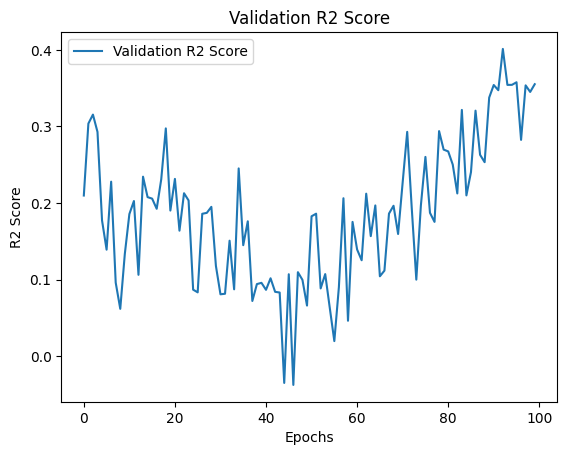

In [242]:
#train_loss_log, train_acc_log, val_loss_log, val_acc_log

plt.plot(val_acc_log, label='Validation R2 Score')
plt.title('Validation R2 Score')
plt.xlabel('Epochs')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

In [89]:
len(train_acc_log)

1820

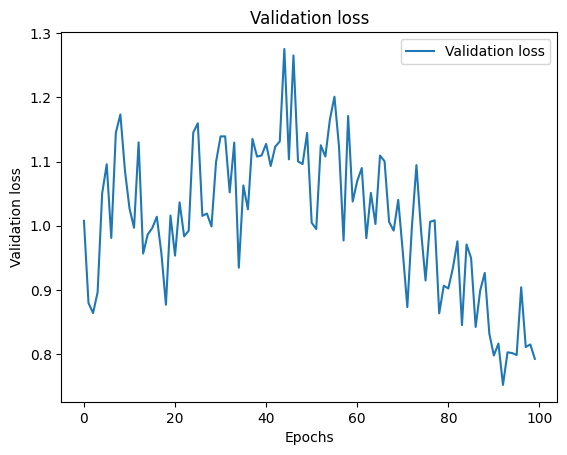

In [245]:
#train_loss_log, train_acc_log, val_loss_log, val_acc_log

plt.plot(val_loss_log, label='Validation loss')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()


In [ ]:
len(val_acc_log)

20

In [ ]:
def plot_metrics(train_loss_log, train_acc_log, val_loss_log, val_acc_log):
    epochs = range(1, len(train_loss_log) + 1)

    # Plot loss
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss_log, 'b', label='Training Loss')
    plt.plot(epochs, [np.mean(val_loss_log)] * len(val_loss_log), 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(train_acc_log) + 1), train_acc_log, 'b', label='Training R2 Score')
    plt.plot(range(1, len(val_acc_log) + 1), val_acc_log, 'r', label='Validation R2 Score')
    plt.title('Training and Validation R2 Score')
    plt.xlabel('Epochs')
    plt.ylabel('R2 Score')
    plt.legend()

    plt.tight_layout()
    plt.show()


ValueError: x and y must have same first dimension, but have shapes (1820,) and (20,)

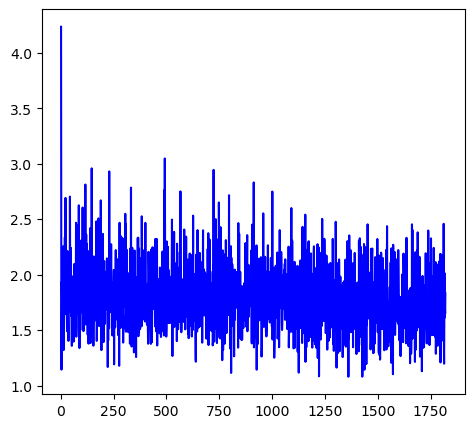

In [ ]:
plot_metrics(train_loss_log, train_acc_log, val_loss_log, val_acc_log)